In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from wordcloud import WordCloud
from textblob import TextBlob



warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


In [19]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from wordcloud import WordCloud
from textblob import TextBlob

In [20]:
df = pd.read_csv('all_reviews.csv')


In [21]:
time = ['3 weeks ago', '5 months ago', '4 months ago', '2 weeks ago',
       '6 months ago', '8 months ago', 'a year ago', 'a month ago',
       '2 months ago', '7 months ago', 'a week ago', '9 months ago',
       '11 months ago', '22 hours ago', '10 months ago', '3 months ago','5 days ago', '4 days ago', '2 days ago',
       '6 days ago', 'a day ago', '20 hours ago', '3 days ago',
       '5 hours ago', '4 hours ago', '3 minutes ago', 
       '19 hours ago', '16 hours ago', '15 hours ago']
df1 = df[df.pub_date.isin(time)]


In [22]:
df1['pub_date'] = df['pub_date'].replace(['3 weeks ago', '5 months ago', '4 months ago', '2 weeks ago',
       '6 months ago', '8 months ago', 'a month ago',
       '2 months ago', '7 months ago', 'a week ago', '9 months ago',
       '11 months ago', '22 hours ago', '10 months ago', '3 months ago',
       '5 days ago', '4 days ago', '2 days ago',
       '6 days ago', 'a day ago', '20 hours ago', '3 days ago',
       '5 hours ago', '4 hours ago', '3 minutes ago', 
       '19 hours ago', '16 hours ago', '15 hours ago'], 'pandemic')

<ipython-input-22-ae9710f7d03a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pub_date'] = df['pub_date'].replace(['3 weeks ago', '5 months ago', '4 months ago', '2 weeks ago',


In [23]:
df1['pub_date'].nunique()

2

In [24]:
df1['ratings'] = df['ratings'].replace([' 5 stars ', ' 4 stars ', ' 3 stars ', ' 1 star ', ' 2 stars '],[5 ,4 , 3, 1, 2])

<ipython-input-24-db085f5152be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ratings'] = df['ratings'].replace([' 5 stars ', ' 4 stars ', ' 3 stars ', ' 1 star ', ' 2 stars '],[5 ,4 , 3, 1, 2])


In [26]:
df1['review'] = df1['review'].astype(str)


<ipython-input-26-7ee25cb03fa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review'] = df1['review'].astype(str)


In [25]:
 df4 = df1[df1['review'].notna()]

In [27]:
df4['tidy_rev'] = df4['review'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-27-67c1a42d98c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tidy_rev'] = df4['review'].str.replace("[^a-zA-Z#]", " ")


In [28]:
df4['tidy_rev'] = df4['tidy_rev'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

<ipython-input-28-6604067ad6d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tidy_rev'] = df4['tidy_rev'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


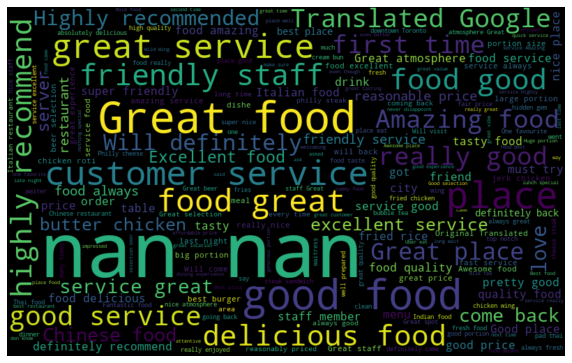

In [12]:
all_words = ' '.join([text for text in df4['tidy_rev']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

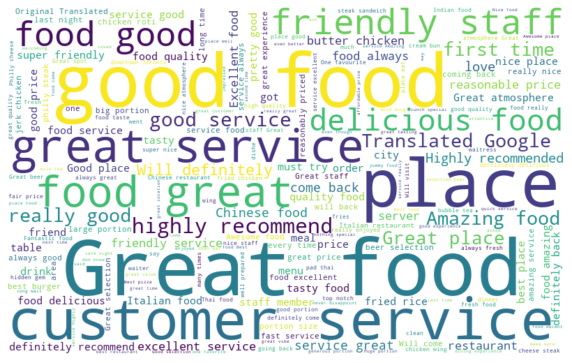

In [29]:
all_words = ' '.join([text for text in df4['tidy_rev']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

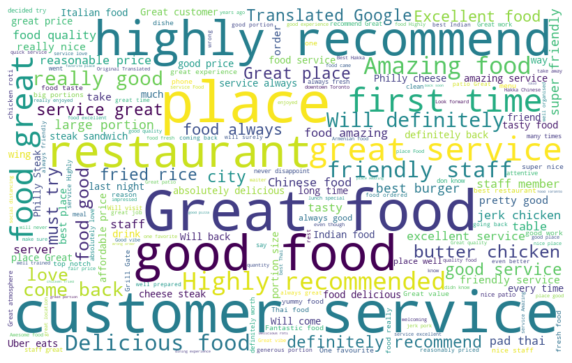

In [31]:
normal_words =' '.join([text for text in df4['tidy_rev'][df4['pub_date'] == 'pandemic']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
df4['Sentiment'] = 0

def percentage(part,whole):
    return 100*float(part)/float(whole)

noofTerms=df4.shape[0]
positive=0
negative=0
neutral=0
polarity=0

for i,tweet in enumerate(df4['tidy_rev']):
    analysis=TextBlob(tweet)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

    if(analysis.sentiment.polarity==0.0):
        df4['Sentiment'][i]=1
    elif(analysis.sentiment.polarity>0.0):
        df4['Sentiment'][i]=2
    elif(analysis.sentiment.polarity<0.0):
        df4['Sentiment'][i]=0
        
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')


<ipython-input-17-67f0396917d2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Sentiment'][i]=2
<ipython-input-17-67f0396917d2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Sentiment'][i]=0
<ipython-input-17-67f0396917d2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Sentiment'][i]=1


NameError: name 'searchTerm' is not defined

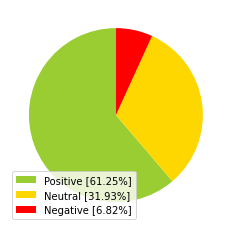

In [18]:
labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show();
